In [1]:
import pandas as pd
import mplfinance as mpf
from datetime import datetime
import utils
import numpy as np
from pylab import plt

In [2]:
 from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

def plot_candle(df, width=.5, figsize=(10, 7), tick_formater='%Y-%m'):        
    m_data = df[['Open', 'High', 'Low', 'Close']].values
    days_m_dates_format = mdates.date2num(df.index.values) 
    data_plot = np.column_stack((days_m_dates_format, m_data))
        
    fig, ax = plt.subplots(figsize=figsize)
    _ = candlestick_ohlc(ax,
                         data_plot,
                         width=width,
                         colorup='green',
                         colordown='red')
    _ = ax.xaxis.set_major_formatter(mdates.DateFormatter(tick_formater))
    return fig, ax

In [ ]:
#Para obtener los datos  http://www.kibot.com/free_historical_data.aspx,
#en el apartado “free tick intraday data” subapartado IVE: “Tick with bid ask
#data”.

In [3]:
df = pd.read_csv(
    'IVE_tickbidask.txt', sep=",",header=None)

In [4]:
df.columns = ['Date','Time','Price','Bid','Ask','Size']
df ['Date'] = pd. to_datetime (df ['Date'])
df['Time']=pd. to_datetime(df['Time'])
mask=df['Date']>='2018-01-01'
df=df[mask]
df.set_index('Date',inplace=True)

In [5]:
#velas anuales

lista=list(df.index)
fecha_inicial=lista[0]
fecha_final=lista.pop()
fecha_inicial
fecha_final

dates=pd.date_range(fecha_inicial,fecha_final,freq='A')

velas=pd.DataFrame(index=dates,columns=['Open','High','Low','Close','Vol'])
velas
open=0


for i in dates:
    mask=df.index.year == i.year 
    subdf=df[mask]
    Open=subdf['Price'][0]
    Close=subdf['Price'][-1]
    High=subdf.max().Price
    Low=subdf.min().Price
    Vol=subdf.sum().Price
    velas.loc[i]=[Open,High,Low,Close,Vol]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\2370628717.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Vol=subdf.sum().Price


(<Figure size 720x504 with 1 Axes>, <AxesSubplot:>)

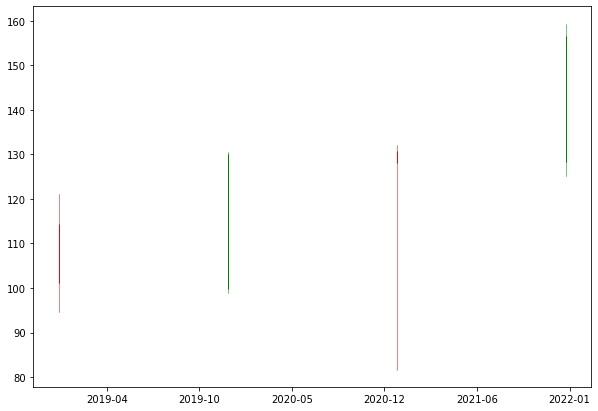

In [6]:
plot_candle(velas)

In [7]:
#velas mensuales

lista=list(df.index)
fecha_inicial=lista[0]
fecha_final=lista.pop()
fecha_inicial
fecha_final

dates=pd.date_range(fecha_inicial,fecha_final,freq='M')

velas=pd.DataFrame(index=dates,columns=['Open','High','Low','Close','Vol'])
velas
open=0


for i in dates:
    
    mask=df.index.year == i.year 
    subdf=df[mask]
    mask=subdf.index.month == i.month
    subdf=subdf[mask]
    Open=subdf['Price'][0]
    Close=subdf['Price'][-1]
    High=subdf.max().Price
    Low=subdf.min().Price
    Vol=subdf.sum().Price
    velas.loc[i]=[Open,High,Low,Close,Vol]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\192066076.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Vol=subdf.sum().Price


(<Figure size 720x504 with 1 Axes>, <AxesSubplot:>)

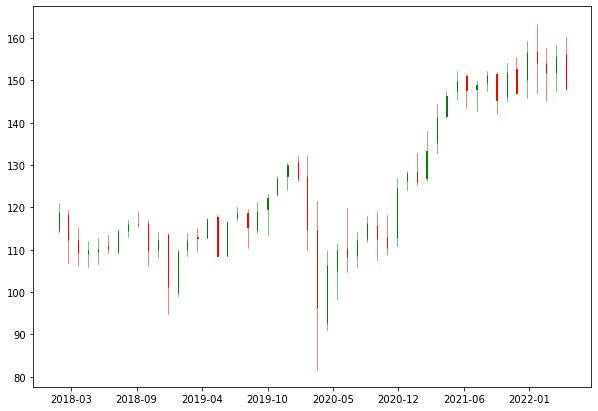

In [8]:
plot_candle(velas)

In [9]:
#velas diarias
#Acortamos un poco el dataset para que no sean demasiados días
mask=df.index>='2022-03-01'
df=df[mask]

lista=list(df.index)
fecha_inicial=lista[0]
fecha_final=lista.pop()
fecha_inicial
fecha_final

dates=pd.date_range(fecha_inicial,fecha_final,freq='B')

velas=pd.DataFrame(index=dates,columns=['Open','High','Low','Close','Vol'])
velas
open=0


for i in dates:
    
    mask=df.index.year == i.year 
    subdf=df[mask]
    mask=subdf.index.month == i.month
    subdf=subdf[mask]
    mask=subdf.index.day == i.day
    subdf=subdf[mask]
    print(i.day,i.month,i.year)
    print(subdf.index)
    if not subdf.empty:    
        Open=subdf['Price'][0]
        Close=subdf['Price'][-1]
        High=subdf.max().Price
        Low=subdf.min().Price
        Vol=subdf.sum().Price
        velas.loc[i]=[Open,High,Low,Close,Vol]


1 3 2022
DatetimeIndex(['2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01',
               ...
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
               '2022-03-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', length=5162, freq=None)
2 3 2022
DatetimeIndex(['2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
               '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
               '2022-03-02', '2022-03-02',
               ...
               '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
               '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
               '2022-03-02', '2022-03-02'],
              dtype='datetime64[ns]', name='Date', length=8086, freq=None)
3 3 2022
DatetimeIndex(['2022-03-03', '2022-03-03', 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\2328400542.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Vol=subdf.sum().Price


4 3 2022
DatetimeIndex(['2022-03-04', '2022-03-04', '2022-03-04', '2022-03-04',
               '2022-03-04', '2022-03-04', '2022-03-04', '2022-03-04',
               '2022-03-04', '2022-03-04',
               ...
               '2022-03-04', '2022-03-04', '2022-03-04', '2022-03-04',
               '2022-03-04', '2022-03-04', '2022-03-04', '2022-03-04',
               '2022-03-04', '2022-03-04'],
              dtype='datetime64[ns]', name='Date', length=7270, freq=None)
7 3 2022
DatetimeIndex(['2022-03-07', '2022-03-07', '2022-03-07', '2022-03-07',
               '2022-03-07', '2022-03-07', '2022-03-07', '2022-03-07',
               '2022-03-07', '2022-03-07',
               ...
               '2022-03-07', '2022-03-07', '2022-03-07', '2022-03-07',
               '2022-03-07', '2022-03-07', '2022-03-07', '2022-03-07',
               '2022-03-07', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=7976, freq=None)
8 3 2022
DatetimeIndex(['2022-03-08', '2022-03-08', 

30 3 2022
DatetimeIndex(['2022-03-30', '2022-03-30', '2022-03-30', '2022-03-30',
               '2022-03-30', '2022-03-30', '2022-03-30', '2022-03-30',
               '2022-03-30', '2022-03-30',
               ...
               '2022-03-30', '2022-03-30', '2022-03-30', '2022-03-30',
               '2022-03-30', '2022-03-30', '2022-03-30', '2022-03-30',
               '2022-03-30', '2022-03-30'],
              dtype='datetime64[ns]', name='Date', length=3836, freq=None)
31 3 2022
DatetimeIndex(['2022-03-31', '2022-03-31', '2022-03-31', '2022-03-31',
               '2022-03-31', '2022-03-31', '2022-03-31', '2022-03-31',
               '2022-03-31', '2022-03-31',
               ...
               '2022-03-31', '2022-03-31', '2022-03-31', '2022-03-31',
               '2022-03-31', '2022-03-31', '2022-03-31', '2022-03-31',
               '2022-03-31', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', length=3768, freq=None)
1 4 2022
DatetimeIndex(['2022-04-01', '2022-04-01'

26 4 2022
DatetimeIndex(['2022-04-26', '2022-04-26', '2022-04-26', '2022-04-26',
               '2022-04-26', '2022-04-26', '2022-04-26', '2022-04-26',
               '2022-04-26', '2022-04-26',
               ...
               '2022-04-26', '2022-04-26', '2022-04-26', '2022-04-26',
               '2022-04-26', '2022-04-26', '2022-04-26', '2022-04-26',
               '2022-04-26', '2022-04-26'],
              dtype='datetime64[ns]', name='Date', length=5117, freq=None)
27 4 2022
DatetimeIndex(['2022-04-27', '2022-04-27', '2022-04-27', '2022-04-27',
               '2022-04-27', '2022-04-27', '2022-04-27', '2022-04-27',
               '2022-04-27', '2022-04-27',
               ...
               '2022-04-27', '2022-04-27', '2022-04-27', '2022-04-27',
               '2022-04-27', '2022-04-27', '2022-04-27', '2022-04-27',
               '2022-04-27', '2022-04-27'],
              dtype='datetime64[ns]', name='Date', length=6749, freq=None)
28 4 2022
DatetimeIndex(['2022-04-28', '2022-04-28

DatetimeIndex(['2022-05-20', '2022-05-20', '2022-05-20', '2022-05-20',
               '2022-05-20', '2022-05-20', '2022-05-20', '2022-05-20',
               '2022-05-20', '2022-05-20',
               ...
               '2022-05-20', '2022-05-20', '2022-05-20', '2022-05-20',
               '2022-05-20', '2022-05-20', '2022-05-20', '2022-05-20',
               '2022-05-20', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4058, freq=None)
23 5 2022
DatetimeIndex(['2022-05-23', '2022-05-23', '2022-05-23', '2022-05-23',
               '2022-05-23', '2022-05-23', '2022-05-23', '2022-05-23',
               '2022-05-23', '2022-05-23',
               ...
               '2022-05-23', '2022-05-23', '2022-05-23', '2022-05-23',
               '2022-05-23', '2022-05-23', '2022-05-23', '2022-05-23',
               '2022-05-23', '2022-05-23'],
              dtype='datetime64[ns]', name='Date', length=3301, freq=None)
24 5 2022
DatetimeIndex(['2022-05-24', '2022-05-24', '2022-0

(<Figure size 720x504 with 1 Axes>, <AxesSubplot:>)

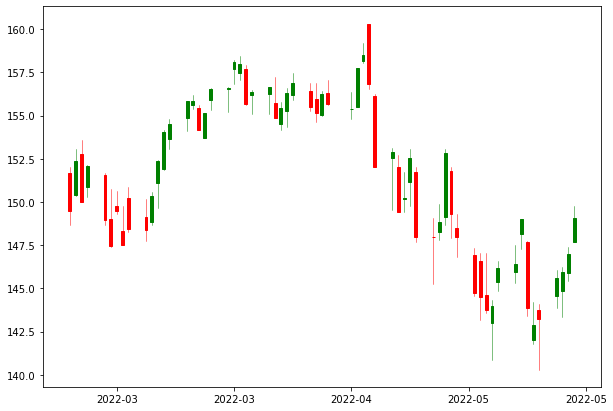

In [10]:
plot_candle(velas)

In [ ]:
#El mensual es el gráfico que sale con un mejor formato

In [11]:
#velas horarias
#Acortamos un poco el dataset para que no sean demasiadas horas
mask=df.index>='2022-05-01'
df=df[mask]


lista=list(df.index)
fecha_inicial=lista[0]
fecha_final=lista.pop()
print(fecha_inicial)
print(fecha_final)

dates=pd.date_range(fecha_inicial,fecha_final,freq='BH')

velas=pd.DataFrame(index=dates,columns=['Open','High','Low','Close','Vol'])
velas
open=0


for i in dates:
    
    mask=df.index.year == i.year 
    subdf=df[mask]
    mask=subdf.index.month == i.month
    subdf=subdf[mask]
    mask=subdf.index.day == i.day
    subdf=subdf[mask]
    
    mask=df.Time.dt.hour==i.hour

    if not subdf.empty:    
        Open=subdf['Price'][0]
        Close=subdf['Price'][-1]
        High=subdf.max().Price
        Low=subdf.min().Price
        Vol=subdf.sum().Price
        velas.loc[i]=[Open,High,Low,Close,Vol]
    

2022-05-02 00:00:00
2022-05-26 00:00:00


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\2104021149.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Vol=subdf.sum().Price


(<Figure size 720x504 with 1 Axes>, <AxesSubplot:>)

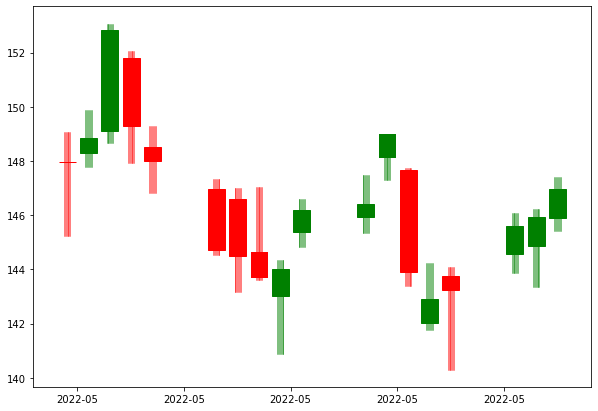

In [12]:
plot_candle(velas)

147.15
146.82
149.23
148.56
145.64
144.34
142.6999
145.7796
147.63
142.85
143.45
148.48


<AxesSubplot:xlabel='Date'>

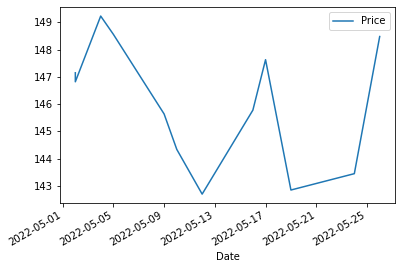

In [13]:
# Tick bars
#Funcion que muestra el precio:
utils.tick_bars(10000,df)

#Figura:

fig=pd.DataFrame(columns=['Price','Date'])


for i in range (len(df)):
    if int(i+1) % 10000==0:
        fig.loc[len(fig)]=[df.iloc[i,1],df.index[i]]


fig.set_index('Date',inplace=True)
fig.plot()  

In [14]:
#Dollar bars

utils.dollar_bars(100000,df)

#Figura

fig=pd.DataFrame(columns=['Price','Date'])

volum=0
for i in range (len(df)):
    if volum>100000:
        fig.loc[len(fig)]=[df.iloc[i,1],df.index[i]]
        volum=0
    volum=volum+df.iloc[i,4]


fig.set_index('Date',inplace=True)


<AxesSubplot:xlabel='Date'>

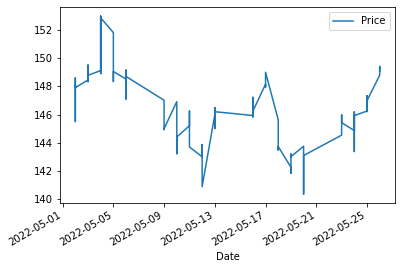

In [48]:
fig.plot() 